# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline

## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 4
bf_env = bf(n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()


x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=0.5, tau = 0.8, replay_buffer_size=1e5, batch_size=32)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=5, cycles=50, episode=16, iteration=50)

Epoch 0 Cycle 0: loss is 0.0945, success rate 0.375
Epoch 0 Cycle 1: loss is 0.129, success rate 0.25
Epoch 0 Cycle 2: loss is 0.127, success rate 0.25
Epoch 0 Cycle 3: loss is 0.139, success rate 0.3125
Epoch 0 Cycle 4: loss is 0.197, success rate 0.1875
Epoch 0 Cycle 5: loss is 0.167, success rate 0.0625
Epoch 0 Cycle 6: loss is 0.2, success rate 0.125
Epoch 0 Cycle 7: loss is 0.178, success rate 0.0625
Epoch 0 Cycle 8: loss is 0.227, success rate 0.25
Epoch 0 Cycle 9: loss is 0.244, success rate 0.25
Epoch 0 Cycle 10: loss is 0.389, success rate 0.1875
Epoch 0 Cycle 11: loss is 0.216, success rate 0.125
Epoch 0 Cycle 12: loss is 0.487, success rate 0.1875
Epoch 0 Cycle 13: loss is 0.389, success rate 0.3125
Epoch 0 Cycle 14: loss is 0.585, success rate 0.0625
Epoch 0 Cycle 15: loss is 0.52, success rate 0.3125
Epoch 0 Cycle 16: loss is 0.623, success rate 0.5
Epoch 0 Cycle 17: loss is 0.381, success rate 0.375
Epoch 0 Cycle 18: loss is 0.475, success rate 0.3125
Epoch 0 Cycle 19: lo

Epoch 3 Cycle 11: loss is 3.32, success rate 0.9375
Epoch 3 Cycle 12: loss is 5.02, success rate 0.8125
Epoch 3 Cycle 13: loss is 4.47, success rate 0.6875
Epoch 3 Cycle 14: loss is 2.5, success rate 0.5625
Epoch 3 Cycle 15: loss is 3.92, success rate 0.75
Epoch 3 Cycle 16: loss is 4.51, success rate 0.8125
Epoch 3 Cycle 17: loss is 4.53, success rate 0.75
Epoch 3 Cycle 18: loss is 3.67, success rate 0.8125
Epoch 3 Cycle 19: loss is 2.23, success rate 0.75
Epoch 3 Cycle 20: loss is 3.16, success rate 0.8125
Epoch 3 Cycle 21: loss is 4.85, success rate 0.75
Epoch 3 Cycle 22: loss is 4.56, success rate 0.6875
Epoch 3 Cycle 23: loss is 3.41, success rate 0.9375
Epoch 3 Cycle 24: loss is 3.42, success rate 0.8125
Epoch 3 Cycle 25: loss is 3.74, success rate 0.8125
Epoch 3 Cycle 26: loss is 2.27, success rate 0.9375
Epoch 3 Cycle 27: loss is 4.36, success rate 0.5625
Epoch 3 Cycle 28: loss is 4.06, success rate 0.8125
Epoch 3 Cycle 29: loss is 3.46, success rate 0.8125
Epoch 3 Cycle 30: los

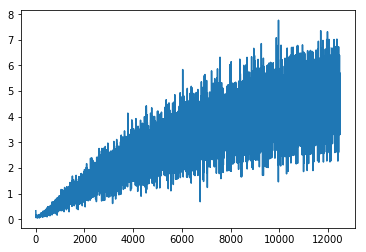

In [5]:
plt.figure()
plt.plot(losses)
plt.show()

## Test DQN

In [15]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, './best_model/model.ckpt')
    
    success = 0
    for i in range(100):
        
        bf_env.reset()

        for i in range(n):
            X = np.concatenate((bf_env.state.reshape((1,-1)),bf_env.goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            bf_env.update_state(action)
            if (bf_env.reward(bf_env.state)==0):
                print('Success! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! state:{0}\t Goal state:{1}'.format(bf_env.state, bf_env.goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from ./best_model/model.ckpt
Success! state:[1 1 0 0]	 Goal state:[1 1 0 0]
Success! state:[0 0 1 1]	 Goal state:[0 0 1 1]
Success! state:[0 0 0 0]	 Goal state:[0 0 0 0]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Success! state:[1 0 1 0]	 Goal state:[1 0 1 0]
Success! state:[1 0 1 0]	 Goal state:[1 0 1 0]
Fail! state:[1 1 1 0]	 Goal state:[1 0 0 1]
Fail! state:[1 0 1 1]	 Goal state:[1 1 1 0]
Fail! state:[1 0 1 1]	 Goal state:[1 1 1 0]
Success! state:[1 0 0 0]	 Goal state:[1 0 0 0]
Success! state:[1 0 1 0]	 Goal state:[1 0 1 0]
Success! state:[0 1 1 1]	 Goal state:[0 1 1 1]
Success! state:[0 0 1 0]	 Goal state:[0 0 1 0]
Success! state:[0 1 0 0]	 Goal state:[0 1 0 0]
Success! state:[1 1 0 1]	 Goal state:[1 1 0 1]
Success! state:[0 0 0 1]	 Goal state:[0 0 0 1]
Success! state:[1 0 1 1]	 Goal state:[1 0 1 1]
Success! state:[0 1 1 0]	 Goal state:[0 1 1 0]
Success! state:[0 1 0 0]	 Goal state:[0 1 0 0]
Success! state:[1 0 1 1]	 Goal state:[1 0 1 1]
Suc

In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a=np.array([3,1,2])

In [9]:
a[a<0] += 2

In [10]:
a

array([3, 1, 2])

In [11]:
(a==None).all()

False

In [12]:
s=np.argmax(a)